# **Capstone Data Analysis**

## Research Question:

  Which factors (study habits, attendance, extracurricular activities) most impact student academic performance?

## Purpose:

  The aim is to analyze the relationships between these variables and see if any statistically significant correlations exist between these factors and grades, and offer reccomendations for school staff based on the results.

## Loading & Cleaning the Data ##

In [1]:
#Importing packages
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#Loading/viewing the data
file_path = 'Students Performance .csv'
data = pd.read_csv(file_path)
data.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [3]:
#Checking for missing values
data.isnull().sum()

Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [4]:
#Dropping the 1 record missing a value
data_clean = data.dropna()

In [5]:
#checking the datatypes
data_clean.dtypes

Student_ID            object
Student_Age           object
Sex                   object
High_School_Type      object
Scholarship           object
Additional_Work       object
Sports_activity       object
Transportation        object
Weekly_Study_Hours     int64
Attendance            object
Reading               object
Notes                 object
Listening_in_Class    object
Project_work          object
Grade                 object
dtype: object

In [6]:
#Checking Grade values
data_clean['Grade'].unique()

array(['AA', 'BA', 'CC', 'Fail', 'BB', 'CB', 'DD', 'DC'], dtype=object)

In [7]:
# Map grades to numeric values
grade_mapping = {
    'AA': 4.0,
    'BA': 3.5,
    'BB': 3.0,
    'CB': 2.5,
    'CC': 2.0,
    'DC': 1.5,
    'DD': 1.0,
    'Fail': 0.0
}

In [8]:
# Apply the mapping to the 'Grade' column
data_clean['Grade'] = data_clean['Grade'].map(grade_mapping)

C:\Users\MEGGOS 2.0\AppData\Local\Temp\ipykernel_15600\1984601380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Grade'] = data_clean['Grade'].map(grade_mapping)


In [9]:
# Check for missing
print(data_clean.isnull().sum())

Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


In [11]:
# Check unique values in the 'Attendance' column
data_clean['Attendance'].unique()

array(['Always', 'Never', 'Sometimes', '3'], dtype=object)

In [12]:
# Mapping to numeric values 
attendance_mapping = {
    'Always': 1.0,
    'Sometimes': 0.5,
    'Never': 0.0
}

# Apply the mapping to the 'Attendance' column
data_clean['Attendance'] = data_clean['Attendance'].map(attendance_mapping)

In [13]:
data_clean['Attendance'].isnull().sum()

np.int64(1)

In [14]:
#Dropping the null
data_clean = data_clean.dropna(subset=['Attendance'])

In [15]:
data_clean['Sports_activity'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# Mapping sports to numeric
sports_mapping = {
    'Yes': 1.0,
    'No': 0.0
}

# Apply the mapping to the 'Sports_activity' column
data_clean['Sports_activity'] = data_clean['Sports_activity'].map(sports_mapping)

In [17]:
data_clean['Notes'].unique()

array(['Yes', 'No', '6'], dtype=object)

In [18]:
data_clean['Reading'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
data_clean['Project_work'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
data_clean['Listening_in_Class'].unique()

array(['No', 'Yes', '6'], dtype=object)

In [21]:
#Investigating those '6' values
data_clean['Notes'].value_counts()

Notes
Yes    75
No     66
6       2
Name: count, dtype: int64

In [22]:
data_clean['Listening_in_Class'].value_counts()

Listening_in_Class
Yes    74
No     68
6       1
Name: count, dtype: int64

In [23]:
#Dropping the rogue '6' values
data_clean = data_clean[(data_clean['Notes'] != 6) & (data_clean['Listening_in_Class'] != 6)]

In [24]:
#Mapping more variables to numeric
notes_mapping = {
    'Yes': 1.0,
    'No': 0.0
}

reading_mapping = {
    'Yes': 1.0,
    'No': 0.0
}

project_work_mapping = {
    'Yes': 1.0,
    'No': 0.0
}

listening_mapping = {
    'Yes': 1.0,
    'No': 0.0
}


In [25]:
#Applying the mapping
data_clean['Notes'] = data_clean['Notes'].map(notes_mapping)
data_clean['Reading'] = data_clean['Reading'].map(reading_mapping)
data_clean['Project_work'] = data_clean['Project_work'].map(project_work_mapping)
data_clean['Listening_in_Class'] = data_clean['Listening_in_Class'].map(listening_mapping)

In [26]:
# Check for missing values in the cleaned variables
print(data_clean[['Notes', 'Reading', 'Project_work', 'Listening_in_Class']].isnull().sum())

Notes                 2
Reading               0
Project_work          0
Listening_in_Class    1
dtype: int64


In [27]:
#Dropping nulls
data_clean = data_clean.dropna(subset=['Notes'])
data_clean = data_clean.dropna(subset=['Listening_in_Class'])

In [28]:
# Verifying dtypes
data_clean[['Notes', 'Reading', 'Project_work', 'Listening_in_Class']].dtypes

Notes                 float64
Reading               float64
Project_work          float64
Listening_in_Class    float64
dtype: object

## **Analyzing the Data**

In [29]:
# Correlation between Attendance and Grades
correlation_attendance, p_value_attendance = pearsonr(data_clean['Attendance'], data_clean['Grade'])

print(f"Correlation coefficient(Attendance): {correlation_attendance}")
print(f"P-value(Attendance): {p_value_attendance}")

Correlation coefficient(Attendance): 0.04517401174145036
P-value(Attendance): 0.596122537873518


**R value indicates a weak positive correlation with grades & the P-value indicates it is not statistically significant.**

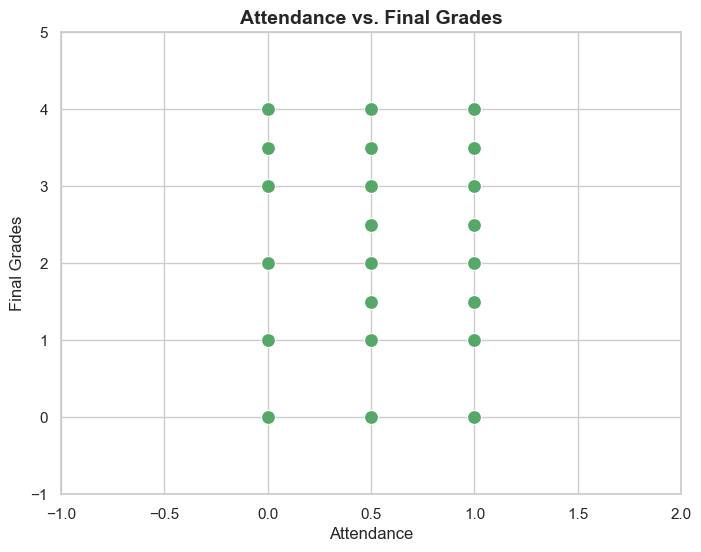

In [30]:
#Scatter plot for Attendance vs. Grades
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Attendance', y='Grade', data=data_clean, color="g", s=100, edgecolor='w')
plt.title('Attendance vs. Final Grades', fontsize=14, fontweight='bold')
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Final Grades', fontsize=12)
plt.xlim(data_clean['Attendance'].min() - 1, data_clean['Attendance'].max() + 1)
plt.ylim(data_clean['Grade'].min() - 1, data_clean['Grade'].max() + 1)
plt.show()

In [31]:
# Correlation between Sports activity and Grades
correlation_sports, p_value_sports = pearsonr(data_clean['Sports_activity'], data_clean['Grade'])

print(f"Correlation coefficient(Sports): {correlation_sports}")
print(f"P-value(Sports): {p_value_sports}")

Correlation coefficient(Sports): -0.1584738240515327
P-value(Sports): 0.0614682292156199


**R value indicates a weak negative correlation with grades & the P-value indicates it is not statistically significant.**

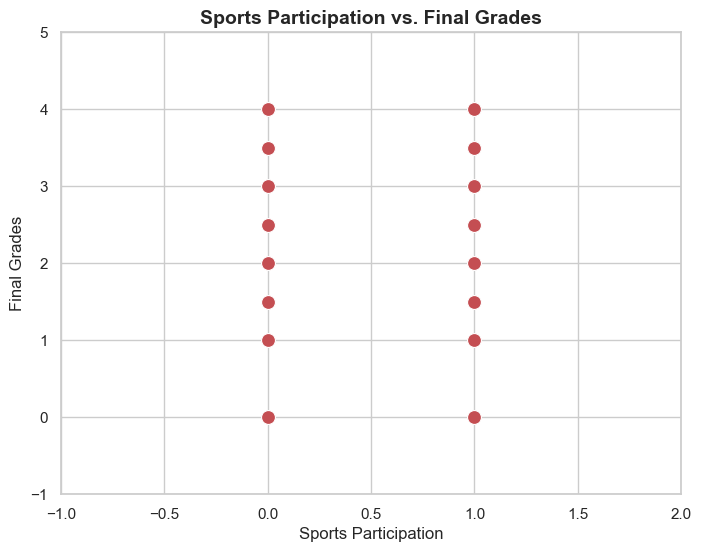

In [32]:
#Scatter plot for Sports Participation vs. Grades
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Sports_activity', y='Grade', data=data_clean, color="r", s=100, edgecolor='w')
plt.title('Sports Participation vs. Final Grades', fontsize=14, fontweight='bold')
plt.xlabel('Sports Participation', fontsize=12)
plt.ylabel('Final Grades', fontsize=12)
plt.xlim(data_clean['Sports_activity'].min() - 1, data_clean['Sports_activity'].max() + 1)
plt.ylim(data_clean['Grade'].min() - 1, data_clean['Grade'].max() + 1)
plt.show()

In [33]:
# Correlation between Weekly Study Hours and Grades
correlation_hours, p_value = pearsonr(data_clean['Weekly_Study_Hours'], data_clean['Grade'])

print(f"Correlation coefficient(Study Hours): {correlation_hours}")
print(f"P-value(Study Hours): {p_value}")

Correlation coefficient(Study Hours): 0.042129302160786614
P-value(Study Hours): 0.6211430230020627


**R value indicates a weak positive correlation with grades & the P-value indicates it is not statistically significant.**

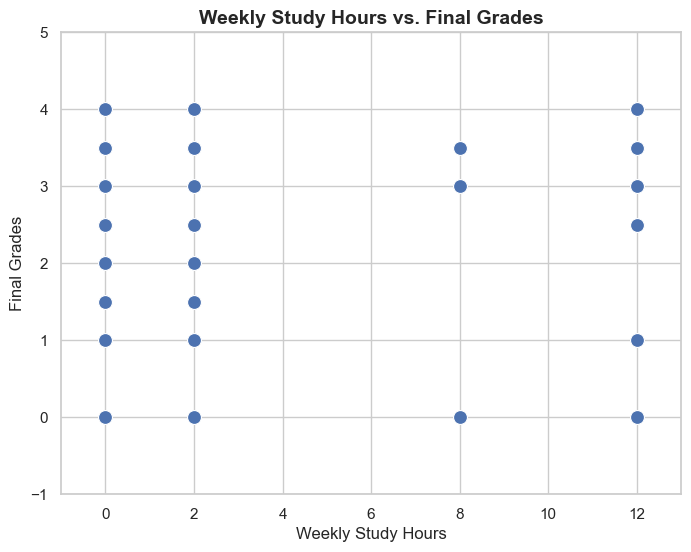

In [34]:
#Scatter plot for Study Hours vs. Grades
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Weekly_Study_Hours', y='Grade', data=data_clean, color="b", s=100, edgecolor='w')
plt.title('Weekly Study Hours vs. Final Grades', fontsize=14, fontweight='bold')
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Final Grades', fontsize=12)
plt.xlim(data_clean['Weekly_Study_Hours'].min() - 1, data_clean['Weekly_Study_Hours'].max() + 1)
plt.ylim(data_clean['Grade'].min() - 1, data_clean['Grade'].max() + 1)
plt.show()

In [35]:
correlation_notes, p_value_notes = pearsonr(data_clean['Notes'], data_clean['Grade'])
print(f"Correlation coefficient (Notes): {correlation_notes}")
print(f"P-value (Notes): {p_value_notes}")

correlation_reading, p_value_reading = pearsonr(data_clean['Reading'], data_clean['Grade'])
print(f"\nCorrelation coefficient (Reading): {correlation_reading}")
print(f"P-value (Reading): {p_value_reading}")

correlation_project, p_value_project = pearsonr(data_clean['Project_work'], data_clean['Grade'])
print(f"\nCorrelation coefficient (Project Work): {correlation_project}")
print(f"P-value (Project Work): {p_value_project}")

correlation_listening, p_value_listening = pearsonr(data_clean['Listening_in_Class'], data_clean['Grade'])
print(f"\nCorrelation coefficient (Listening in Class): {correlation_listening}")
print(f"P-value (Listening in Class): {p_value_listening}")

Correlation coefficient (Notes): 0.02895537590637326
P-value (Notes): 0.7341545817485176

Correlation coefficient (Reading): 0.15620092363541555
P-value (Reading): 0.065335787532388

Correlation coefficient (Project Work): 0.06631043485677493
P-value (Project Work): 0.43632224622506094

Correlation coefficient (Listening in Class): 0.024644918224558575
P-value (Listening in Class): 0.7725567677538561


**Notes, Reading, Project Work, & Listening in Class all have very weak correlations and none were statistically significant based on the coefficients and p-values above.**

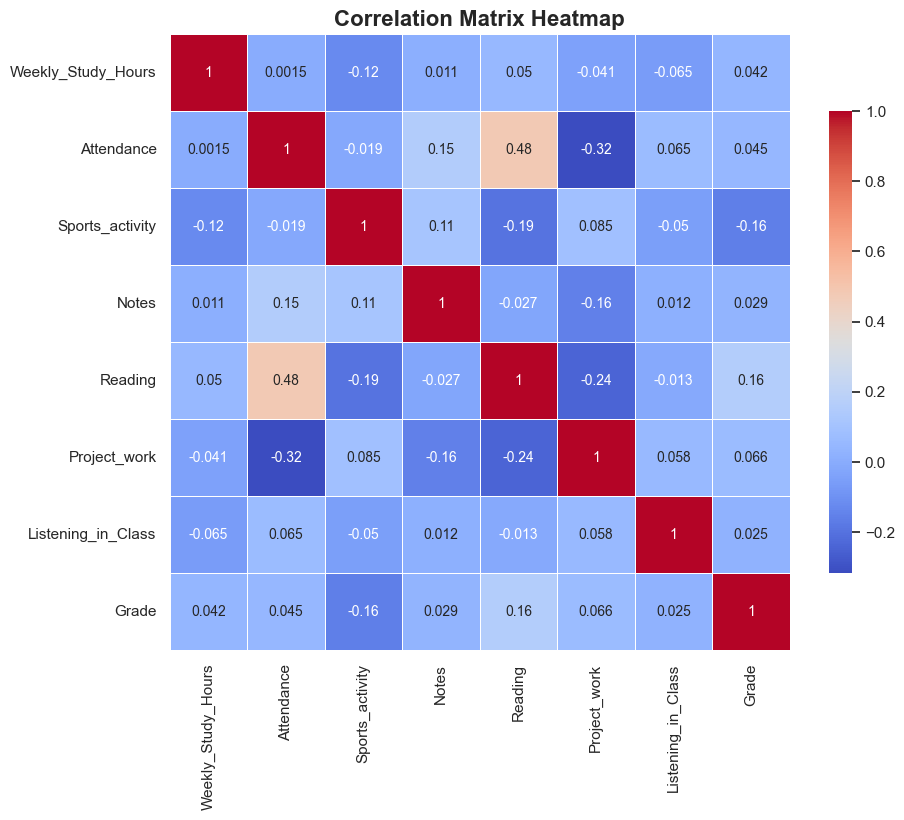

In [36]:
#Heatmap to show the correlation for the rest of the variables
plt.figure(figsize=(10, 8))
corr_matrix = data_clean[['Weekly_Study_Hours', 'Attendance', 'Sports_activity', 'Notes', 'Reading', 'Project_work', 'Listening_in_Class', 'Grade']].corr()
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10}, cbar_kws={'shrink': 0.75})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.show()


## Overview

Although none of the variables showed statistically significant relationships, the analysis still provided useful insights for schools looking to improve student outcomes. Further studies into the relationships of these factors can use these findings as a baseline, to improve on any existing interventions, for instance more structured study time. 